# Regresion lineal 

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

In [332]:
#cargamos las librerias

import numpy as np #calculo numerico y analisis de datos    
import pandas as pd #manejo y analisis de estructuras de datos
import matplotlib.pyplot as plt #creacion de  graficos en 2 dimensiones
import seaborn as sns #creacion de  graficos 
from sklearn import preprocessing #para labelear

#librerias para  imprementar  modelos de ciencia de datos
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
from sklearn.model_selection import train_test_split
Datos3 = pd.read_csv('C:/Users/PC/Desktop/data/Anexo 2 - Dataset Vehicle/Car details v3.csv')


# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [335]:
Datos3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,8128,2058,Maruti Swift Dzire VDI,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,8128.0,NaN,NaN,NaN,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,NaN,NaN,NaN,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,NaN,NaN,NaN,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
fuel,8128,4,Diesel,4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,8128,3,Individual,6766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,8128,2,Manual,7078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,8128,5,First Owner,5289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,7907,393,18.9 kmpl,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,7907,121,1248 CC,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
Datos3.head(0).T

""
name
year
selling_price
km_driven
fuel
seller_type
transmission
owner
mileage
engine


In [339]:
Datos3.shape

(8128, 13)

## tomamos el data ser  mas grande en este caso datos 3 y revisamos como estan los datos

In [342]:
Datos3.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [344]:
#Vamos a quitar los valores nulos y a validar cuantos datos nos quedan y como nos quedan
Datos3=Datos3.dropna()

In [346]:
Datos3.shape

(7906, 13)

In [348]:
Datos3.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

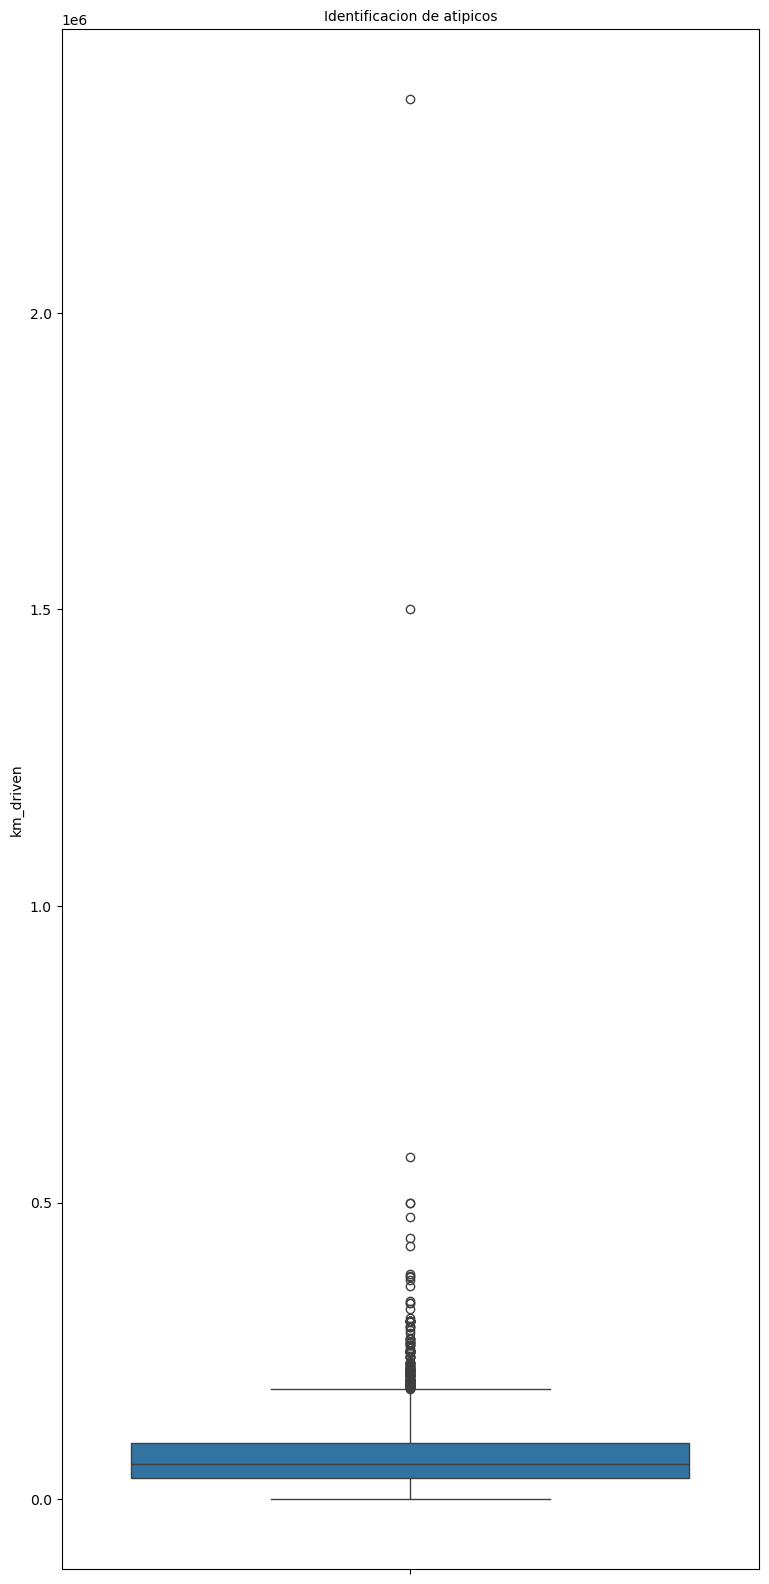

In [350]:
plt.figure(figsize=(9,20))
sns.boxplot(data=Datos3['km_driven'])
##plt.xticks(rotation = 90)
plt.title('Identificacion de atipicos', fontsize =10)
plt.show() 

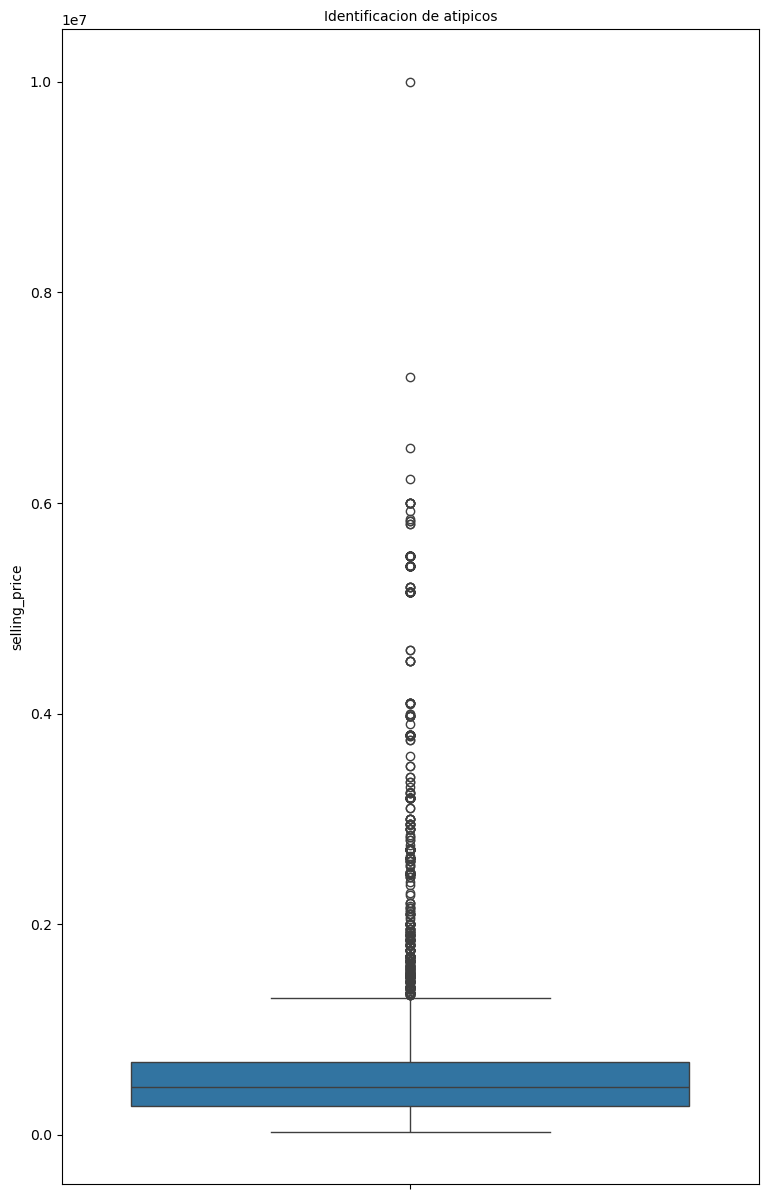

In [352]:
plt.figure(figsize=(9, 15))
sns.boxplot(data=Datos3['selling_price'])
##plt.xticks(rotation = 90)
plt.title('Identificacion de atipicos', fontsize =10)
plt.show() 

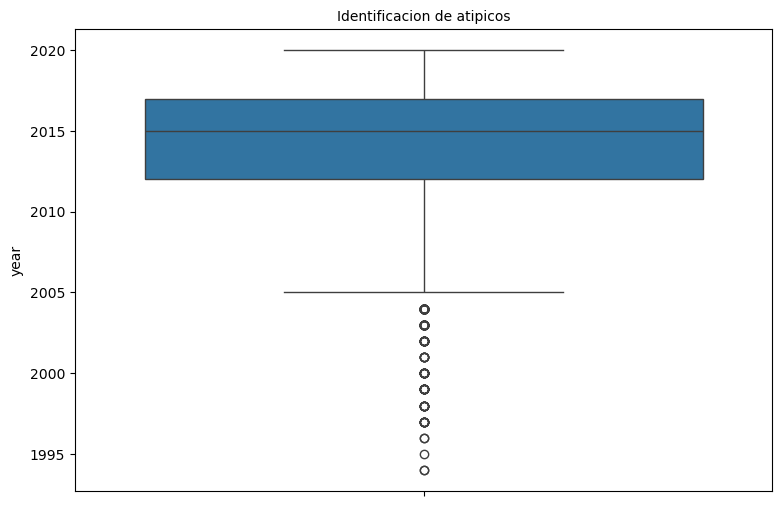

In [354]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=Datos3['year'])
##plt.xticks(rotation = 90)
plt.title('Identificacion de atipicos', fontsize =10)
plt.show() 

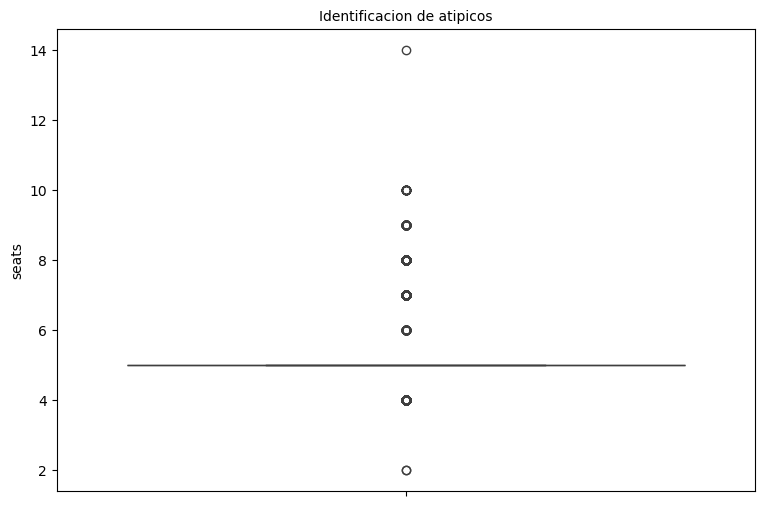

In [356]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=Datos3['seats'])
##plt.xticks(rotation = 90)
plt.title('Identificacion de atipicos', fontsize =10)
plt.show() 

1.de el precio de  venta se va eliminar los valores mayores a 8000000 usd
2.de los kilometros recorridos se va a eliminar 500000 km

In [359]:

nivel_maximo_price=8000000
total_atipicos=((Datos3['selling_price']>nivel_maximo_price)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 1


In [361]:
nivel_maximo_km=500000
total_atipicos=((Datos3['km_driven']>nivel_maximo_km)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 3


In [363]:
Datos3=Datos3[(Datos3['km_driven']<nivel_maximo_km)&(Datos3['selling_price']<nivel_maximo_price)]

In [365]:

nivel_maximo_price=8000000
total_atipicos=((Datos3['selling_price']>nivel_maximo_price)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


In [367]:
nivel_maximo_km=500000
total_atipicos=((Datos3['km_driven']>nivel_maximo_km)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


# 3 Selecionar las caracteristicas mas relevantes para entrenar el modelo utilizando selecion de caracteristicas
caracteristica de interes
* prediccion del precio de venta

In [370]:
Datos3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7900 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7900 non-null   object 
 1   year           7900 non-null   int64  
 2   selling_price  7900 non-null   int64  
 3   km_driven      7900 non-null   int64  
 4   fuel           7900 non-null   object 
 5   seller_type    7900 non-null   object 
 6   transmission   7900 non-null   object 
 7   owner          7900 non-null   object 
 8   mileage        7900 non-null   object 
 9   engine         7900 non-null   object 
 10  max_power      7900 non-null   object 
 11  torque         7900 non-null   object 
 12  seats          7900 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.1+ KB


In [372]:
Datos3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,7900,1980,Maruti Swift Dzire VDI,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,7900.0,NaN,NaN,NaN,2013.985949,3.863598,1994.0,2012.0,2015.0,2017.0,2020.0
selling_price,7900.0,NaN,NaN,NaN,648810.541519,807023.288767,29999.0,270000.0,450000.0,690000.0,7200000.0
km_driven,7900.0,NaN,NaN,NaN,68549.072532,47156.277356,1.0,34875.0,60000.0,95000.0,475000.0
fuel,7900,4,Diesel,4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,7900,3,Individual,6557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,7900,2,Manual,6860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,7900,5,First Owner,5213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,7900,392,18.9 kmpl,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,7900,121,1248 CC,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
Datos3['fuel'].value_counts()

fuel
Diesel    4297
Petrol    3516
CNG         52
LPG         35
Name: count, dtype: int64

In [376]:
Datos3['seller_type'].value_counts()

seller_type
Individual          6557
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [378]:
Datos3['transmission'].value_counts()

transmission
Manual       6860
Automatic    1040
Name: count, dtype: int64

In [380]:
Datos3['owner'].value_counts()

owner
First Owner             5213
Second Owner            2012
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

In [413]:
Datos3['name'].value_counts()

name
Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC                        1
Hyundai i20 Active 1.2 SX with AVN                1
Ambassador CLASSIC 1500 DSL AC                    1
Tata Harrier XZ Dark Edition BSIV                 1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: count, Length: 1980, dtype: int64

In [419]:
# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()
Datos3['fuel'] = label_encoder.fit_transform(Datos3['fuel'])
Datos3['seller_type'] = label_encoder.fit_transform(Datos3['seller_type'])
Datos3['transmission'] = label_encoder.fit_transform(Datos3['transmission'])
Datos3['owner'] = label_encoder.fit_transform(Datos3['owner'])
Datos3['name'] = label_encoder.fit_transform(Datos3['name'])
Datos3['torque'] = label_encoder.fit_transform(Datos3['torque'])
Datos3['mileage'] = label_encoder.fit_transform(Datos3['mileage'])
Datos3['engine'] = label_encoder.fit_transform(Datos3['engine'])
Datos3['max_power'] = label_encoder.fit_transform(Datos3['max_power'])

In [421]:
Datos3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7900 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7900 non-null   int64  
 1   year           7900 non-null   int64  
 2   selling_price  7900 non-null   int64  
 3   km_driven      7900 non-null   int64  
 4   fuel           7900 non-null   int64  
 5   seller_type    7900 non-null   int64  
 6   transmission   7900 non-null   int64  
 7   owner          7900 non-null   int64  
 8   mileage        7900 non-null   int64  
 9   engine         7900 non-null   int32  
 10  max_power      7900 non-null   int32  
 11  torque         7900 non-null   int64  
 12  seats          7900 non-null   float64
dtypes: float64(1), int32(2), int64(10)
memory usage: 802.3 KB


In [439]:
Datos3.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
name,7900.0,1011.995443,527.874796,0.0,590.0,1050.0,1354.0,1979.0
year,7900.0,2013.985949,3.863598,1994.0,2012.0,2015.0,2017.0,2020.0
selling_price,7900.0,648810.541519,807023.288767,29999.0,270000.0,450000.0,690000.0,7200000.0
km_driven,7900.0,68549.072532,47156.277356,1.0,34875.0,60000.0,95000.0,475000.0
fuel,7900.0,1.887975,1.001446,0.0,1.0,1.0,3.0,3.0
seller_type,7900.0,0.889747,0.397321,0.0,1.0,1.0,1.0,2.0
transmission,7900.0,0.868354,0.338126,0.0,1.0,1.0,1.0,1.0
owner,7900.0,0.789747,1.205852,0.0,0.0,0.0,2.0,4.0
mileage,7900.0,223.971266,100.042130,0.0,153.0,223.0,314.0,391.0
engine,7900.0,47.592405,39.572317,0.0,13.0,34.0,85.0,120.0


In [505]:
Datos3.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1249,2014,450000,145500,1,1,1,0,335,13,241,178,5.0
1,1546,2014,370000,120000,1,1,1,2,284,36,13,260,5.0
2,375,2006,158000,140000,3,1,1,4,180,35,250,66,5.0
3,743,2010,225000,127000,1,1,1,0,327,24,294,224,5.0
4,1290,2007,130000,120000,3,1,1,0,136,14,285,21,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1350,2013,260000,50000,3,1,1,2,210,119,221,423,5.0
8122,735,2014,475000,80000,1,1,1,2,318,24,289,221,5.0
8123,733,2013,320000,110000,3,1,1,0,202,10,264,37,5.0
8124,618,2007,135000,119000,1,1,1,1,154,32,28,250,5.0


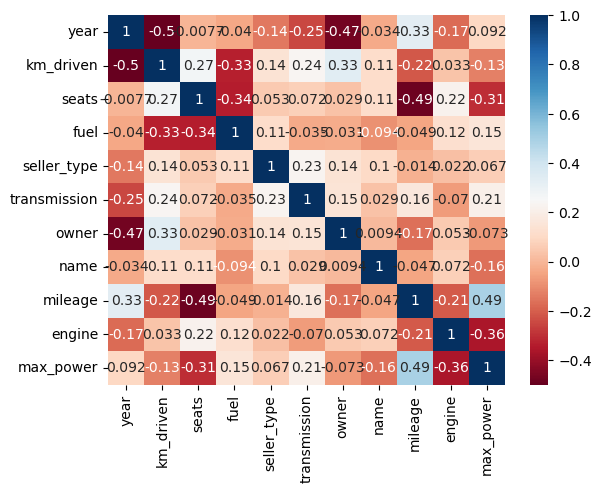

In [507]:
predictors_col = ['year','km_driven','seats','fuel','seller_type','transmission','owner','name','mileage','engine','max_power']
predictors = Datos3[predictors_col]

sns.heatmap(predictors.corr(), annot=True, cmap="RdBu")
plt.show()

# 4 BRB 

In [510]:
# porcentaje de datos para  entrenamiento (train) = 70%, y para prueba (test) = 30%

#se crean variables  X e Y para almacenar la informacion del entrenamiento
#X = Datos3.drop('selling_price',axis=1) 
X = Datos3[['year','km_driven','seats','fuel','seller_type','transmission','owner','name','mileage','engine','max_power']] # se  cargan los datos de train sin los datos de la columna diabetico
Y = Datos3['selling_price'] # se cargan los datos de train con los datos d ela columna diabetico

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state =0)

In [512]:
modelo = LinearRegression()
modelo.fit(x_train,y_train)

#beta_0 = modelo.intercept_
#beta_1 , beta_2 , beta_3 , beta_4,beta_5,beta_6,beta_7 = modelo.coef_

#print(f"Intercepto (B0)): {beta_0}")
#print(f"coeficiente (Año de compra ,B1)): {beta_1}")
#print(f"coeficiente (Asientos,B2)): {beta_2}")
#print(f"coeficiente (kilometros conducidos,B3)): {beta_3}")
#print(f"coeficiente (tipo de  combustible,B3)): {beta_4}")
#print(f"coeficiente (tipo de vendedor,B3)): {beta_5}")
#print(f"coeficiente (tipo de transmision,B3)): {beta_6}")
#print(f"coeficiente (cantidad de  dueños anteriores,B3)): {beta_7}")

LinearRegression()

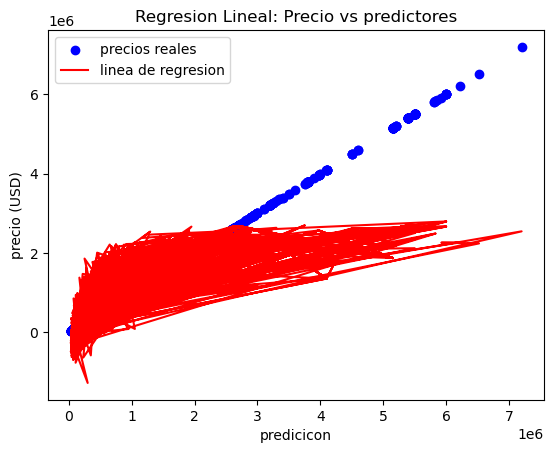

In [514]:
plt.scatter(Datos3['selling_price'] , Y , color ='blue', label = 'precios reales')
plt.plot(Datos3['selling_price'],modelo.predict(X),color = 'red', label ='linea de regresion')
plt.title('Regresion Lineal: Precio vs predictores')
plt.xlabel('predicicon')

plt.ylabel('precio (USD)')
plt.legend()
plt.show()

In [516]:
predicciones = modelo.predict(x_test)

In [518]:
predicciones

array([ 803303.12245762,  703677.81510004,  308067.14499903, ...,
       2303711.08304691,  680283.94540501, 1515783.68266246])

In [525]:
r2 = metrics.r2_score(y_test, predicciones)
mae = metrics.mean_absolute_error(y_test,predicciones)
mse = metrics.mean_squared_error(y_test,predicciones)
rmse = np.sqrt(mse)

print(f'r2 (coeficiente de determinacion): {r2}')
print(f'r2 (error absoluto medio): {mae}')

r2 (coeficiente de determinacion): 0.5696088568915985
r2 (error absoluto medio): 314295.5800921952


* Los datos dentro de el csv son insuficientes  para para  determinar  correctamente el precio 
* los datos tienen un grado de correlacion muy bajo como para que  influyan en la prediccion del precio
* el modelo predice correctamente  0.56% de las veces pero esto es insuficiente para conciderarlo un buen modelo
